<a href="https://colab.research.google.com/github/luishpinto/waterfall-chart/blob/main/waterfall_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
# matplotlib.rcParams['mathtext.fontset'] = 'stix'
# matplotlib.rcParams['font.family'] = ['sans-serif']
matplotlib.rcParams['font.size'] = 10

from scipy import ndimage
import imageio

In [2]:
class waterfall:
  def __init__(self, title, xlabel, ylabel, size, limit):
    self.x = np.array([])
    self.label = np.array([])
    self.tp = np.array([])      # type: 0 = totals; 1 = adde/subtracted values
    self.bottom = np.array([])
    self.color = np.array([])
    self.title = title
    self.xlabel = xlabel
    self.ylabel = ylabel
    self.size = size
    self.limit = limit

  def add(self, x, label, tp):
    self.x = np.append(self.x, x).flatten()
    self.label = np.append(self.label, label).flatten()
    self.tp = np.append(self.tp, tp).flatten()
    self.bottom = np.zeros(len(self.x))
    self.color = np.repeat('darkslategrey', len(self.x))
    
    for i in range(len(self.x)):
      if (self.tp[i] == 0):
        self.bottom[i] = 0.0
      else:
        self.bottom[i] = self.bottom[i - 1] + self.x[i - 1]
        if (self.x[i] >= 0):
          self.color[i] = 'lawngreen'
        else:
          self.color[i] = 'red'

  def adj(self, label):
    self.x = np.append(self.x, self.bottom[-1] + self.x[-1]).flatten()
    self.label = np.append(self.label, label).flatten()
    self.tp = np.append(self.tp, 0).flatten()
    self.bottom = np.append(self.bottom, 0.0).flatten()
    self.color = np.append(self.color, 'darkslategrey').flatten()

  def plot(self):
    fig, ax = plt.subplots(figsize = self.size)
    plt.bar(x = range(len(self.x)), height = self.x, bottom = self.bottom, \
            color = self.color, edgecolor = 'black', \
            linewidth = 0.75, width = 0.95)
    
    for i in range(len(self.x)):
      if (self.tp[i] == 0):
        color = 'white'
      else:
        color = 'black'

      if (self.tp[i] != 0):
        plt.text(i, 0.50 * self.x[i] + self.bottom[i], '{:.1f}'.format(self.x[i]), ha = 'center', va = 'center', color = color)
      else:
        if (self.bottom[i] > self.limit[0]):
          plt.text(i, 0.50 * self.x[i] + self.bottom[i], '{:.1f}'.format(self.x[i]), ha = 'center', va = 'center', color = color)
        else:
          plt.text(i, 0.50 * (self.x[i] + self.limit[0]), '{:.1f}'.format(self.x[i]), ha = 'center', va = 'center', color = color)

    plt.ylim(self.limit[0], self.limit[1])

    plt.xticks(ticks = range(len(self.x)), labels = self.label, rotation = 'vertical')
    plt.axhline(y = 0.0, color = 'k', lw = 2.5, zorder = -10)
    
    plt.title(self.title)
    plt.xlabel(self.xlabel)
    plt.ylabel(self.ylabel)

    plt.tight_layout()
    plt.savefig(self.title + '.jpg', dpi = 600, format = 'jpg')
    plt.show()

In [3]:
wtfl = waterfall('MACHINE-SHOP MONTHLY PRODUCTION', '', 'VOLUME [ un x 1,000 ]', [8.0, 8.0], [540.0, 580.0])
wtfl.add(546.3, 'BUDGET', 0)
wtfl.add([17.4, -5.2, -0.6, 8.2, 7.9, 3.3], ['MF1', 'MF2', 'MF3', 'MF4', 'MF5', 'MF6'], [1, 1, 1, 1, 1, 1])
wtfl.adj('ACTUAL')

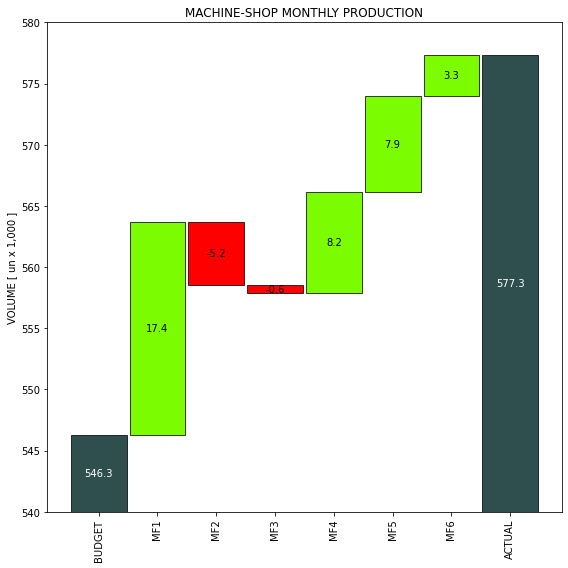

In [4]:
wtfl.plot()

In [5]:
earn = waterfall('Division Earnings', '', 'Profit [ M USD ]', [8.0, 8.0], [-200.0, 200.0])
earn.add(-20.0, "Last year", 0)
earn.add([60.0, 30.0, -50.0, -150.0, -40.0, 70.0, 130.0, 90.0], \
         ['Price', 'Volume', 'Currency', 'Taxes', 'Escl', 'Mix', 'Products', 'Partners'], \
         np.repeat([1], 8))
earn.adj('This year')

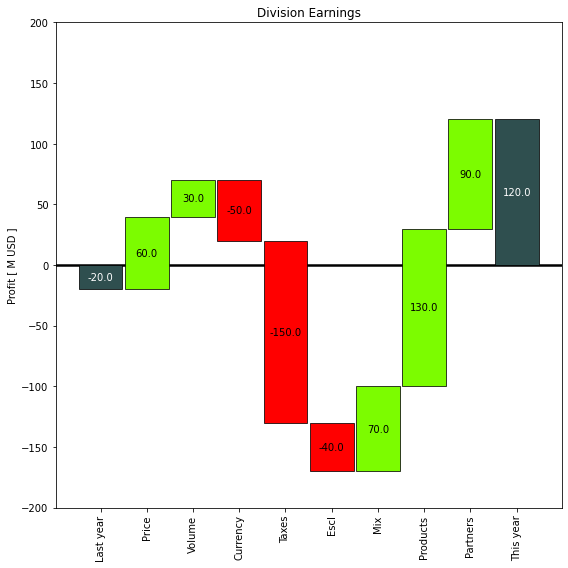

In [6]:
earn.plot()